# Zerobase EDA 3일차
## 웹 데이터 분석

### 한글 깨짐 방지

Text(0.5, 1.0, '데이터 사이언스')

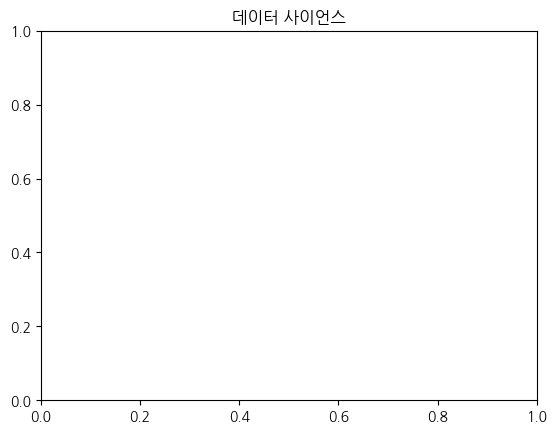

In [1]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('데이터 사이언스')

## Beautiful Soup과 크롬 개발자 도구를 이해하기 위해서 간단한 예제로 실습 진행

## Beautiful Soup 설치

In [2]:
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### 예제 1. 네이버 금융 페이지 살펴보기
#### 웹 주소(URL)에 접근할 때는 urllib의 request 모듈이 필요

In [3]:
# 주소 - https://finance.naver.com/marketindex/
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://finance.naver.com/marketindex/'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240306115636/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240306115636/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 U

In [5]:
# 특정 태그 안에 클래스 부분만 가져오기
soup.find_all('span', 'value')

[<span class="value">1,317.00</span>,
 <span class="value">895.52</span>,
 <span class="value">1,439.88</span>,
 <span class="value">182.93</span>,
 <span class="value">148.1200</span>,
 <span class="value">1.0914</span>,
 <span class="value">1.2767</span>,
 <span class="value">102.7700</span>,
 <span class="value">78.93</span>,
 <span class="value">1639.52</span>,
 <span class="value">2165.2</span>,
 <span class="value">91830.48</span>]

### 다른 방법

In [6]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import requests

url = "https://finance.naver.com/marketindex/"
response = requests.get(url) # requests.post() -> 이런 방식도 있음
soup = BeautifulSoup(response.text, "html.parser") 
print(soup.prettify())

<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240306115636/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240306115636/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 U

In [9]:
# find, find_all -> select, select_one
# find, select_one: 단일 선택, find_all, select: 다중 선택
# id는 #, class는 .
exchangeList = soup.select("#exchangeList > li")
len(exchangeList), exchangeList

(4,
 [<li class="on">
  <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
  <h3 class="h_lst"><span class="blind">미국 USD</span></h3>
  <div class="head_info point_dn">
  <span class="value">1,317.50</span>
  <span class="txt_krw"><span class="blind">원</span></span>
  <span class="change"> 11.00</span>
  <span class="blind">하락</span>
  </div>
  </a>
  <a class="graph_img" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdc', '', '', event);">
  <img alt="" height="153" src="https://ssl.pstatic.net/imgfinance/chart/marketindex/FX_USDKRW.png" width="295"/>
  </a>
  <div class="graph_info">
  <span class="time">2024.03.08 19:38</span>
  <span class="source">하나은행 기준</span>
  <span class="count">고시회차<span class="num">444</span>회</span>
  </div>
  </li>,
  <li class="">
  <a class="head jpy" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_JPYKRW" oncli

In [10]:
# 필요한 데이터만 추출
title = exchangeList[0].select_one(".h_lst").text
exchange = exchangeList[0].select_one(".value").text
change = exchangeList[0].select_one(".change").text
updown = exchangeList[0].select_one(".head_info.point_dn > .blind").text # >는 태그 밑에 바로 하위에 있는 부분을 가져옴

title, exchange, change, updown

('미국 USD', '1,317.50', ' 11.00', '하락')

In [13]:
# find_all로는 이런 식으로
findmethod = soup.find_all("ul", id="exchangeList")
findmethod[0].find_all("span", "value")

[<span class="value">1,317.50</span>,
 <span class="value">895.19</span>,
 <span class="value">1,439.90</span>,
 <span class="value">182.98</span>]

In [14]:
# 링크 추출
baseUrl = "https://finance.naver.com"
baseUrl + exchangeList[0].select_one("a").get("href")

'https://finance.naver.com/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW'

In [24]:
# 4개 데이터를 수집해서 데이터 프레임으로 만들기
import pandas as pd

exchange_datas = [] 
baseUrl = "https://finance.naver.com"

for item in exchangeList:
    data = {
        "title": item.select_one(".h_lst").text,
        "exchnage": item.select_one(".value").text,
        "change": item.select_one(".change").text,
        "updown": item.select_one(".head_info.point_dn > .blind").text,
        "link": baseUrl + item.select_one("a").get("href")
    }
    exchange_datas.append(data)
df = pd.DataFrame(exchange_datas)
df.to_csv('naver_finance_data.csv')

In [25]:
df

title  exchnage  change updown  \
0        미국 USD  1,317.50   11.00     하락   
1  일본 JPY(100엔)    895.19    2.84     하락   
2      유럽연합 EUR  1,439.90    6.57     하락   
3        중국 CNY    182.98    1.40     하락   

                                                link  
0  https://finance.naver.com/marketindex/exchange...  
1  https://finance.naver.com/marketindex/exchange...  
2  https://finance.naver.com/marketindex/exchange...  
3  https://finance.naver.com/marketindex/exchange...

## 예제 2. 위키백과 문서 정보 가져오기 

#### 위키백과에서 검색한 문서 정보를 가져오려고 url을 복사해서 셀에 붙여 넣으면 이상하게 바뀌어서 나타남.... 웹 주소는 UTF-8로 인코딩 되어야함

In [19]:
# 링크 - https://ko.wikipedia.org/wiki/여명의_눈동자
import urllib
from urllib.request import urlopen, Request

html = "https://ko.wikipedia.org/wiki/{search_words}" # 문자열에서 {}는 변수로 취급 -> 포맷팅
req = Request(html.format(search_words=urllib.parse.quote("여명의_눈동자"))) # 글자를 URL로 인코딩 
response = urlopen(req)
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   여명의 눈동자 - 위키백과, 우리 모두의 백과사전
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pi

In [20]:
# 필요한 부분만 텍스트로 가져오기
n = 0 

for each in soup.find_all("ul"):
    print("=>" + str(n) + "========================")
    print(each.get_text())
    n += 1

=>0========================

대문최근 바뀜요즘 화제임의의 문서로기부

=>1========================

사랑방사용자 모임관리 요청

=>2========================

도움말정책과 지침질문방

=>3========================


=>4========================


=>5========================


=>6========================

계정 만들기

로그인


=>7========================

 계정 만들기 로그인

=>8========================

기여토론

=>9========================



처음 위치





1개요







2등장 인물



등장 인물 하위섹션 토글하기





2.1주요 인물







2.2여옥의 주변 인물







2.3하림의 주변 인물







2.4그 외









3제작진







4시청률







5본방송 편성 변경







6재방송 결방 사유 및 편성 변경







7수상 경력







8OST







9참고 사항







10고증 오류







11주해







12각주







13외부 링크





=>10========================


=>11========================




2.1주요 인물







2.2여옥의 주변 인물







2.3하림의 주변 인물







2.4그 외





=>12========================


=>13========================


=>14========================


=>15========================


=>16========================


=>17========================


=>18============

## 예제 3. 시카고 맛집 데이터 분석

### 메인 페이지 분석

출처 - https://www.chicagomag.com/chicago-magazine/november-2012/best-sandwiches-chicago/

### 목표
총 51개 페이지에서 각 가게의 정보를 가져온다 
1. 가게이름 
2. 대표메뉴
3. 대표메뉴의 가격 
4. 가게주소

### 그냥 했던 것처럼 urlopen()해서 하면 403 에러가 뜸.. 접근을 막아놓음
-> 그래서 아래 방법으로

In [27]:
!pip install fake-useragent

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from urllib.request import Request, urlopen 
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

# url 분리 -> 이유는 뒤에서
url_base = "https://www.chicagomag.com/"
url_sub = "Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/"
url = url_base + url_sub  
ua = UserAgent()
req = Request(url, headers={"user-agent": ua.ie})
html = urlopen(req)
soup = BeautifulSoup(html, "html.parser")
print(soup.prettify())

Error occurred during getting browser: ie, but was suppressed with fallback.


<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <link href="https://gmpg.org/xfn/11" rel="profile"/>
   <script src="https://cmp.osano.com/16A1AnRt2Fn8i1unj/f15ebf08-7008-40fe-9af3-db96dc3e8266/osano.js">
   </script>
   <title>
    The 50 Best Sandwiches in Chicago – Chicago Magazine
   </title>
   <style type="text/css">
    .heateor_sss_button_instagram span.heateor_sss_svg,a.heateor_sss_instagram span.heateor_sss_svg{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing a.heateor_sss_button_instagram span{background:#000!important;}div.heateor_sss_standard_follow_icons_container a.heateor_sss_button_instagram span{background:#000;}
										.heateor_sss_horizontal_sharing .heateor_sss_svg,.heateor_sss_standard_follow_icons_container .heateor_sss_svg{
							background-color: #000!important;
				background: #000

In [29]:
# 필요한 부분만 추출 -> select()를 써도 됨
soup.find_all("div", "sammy"), len(soup.find_all("div", "sammy"))

([<div class="sammy" style="position: relative;">
  <div class="sammyRank">1</div>
  <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
  Old Oak Tap<br/>
  <em>Read more</em> </a></div>
  </div>,
  <div class="sammy" style="position: relative;">
  <div class="sammyRank">2</div>
  <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
  Au Cheval<br/>
  <em>Read more</em> </a></div>
  </div>,
  <div class="sammy" style="position: relative;">
  <div class="sammyRank">3</div>
  <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
  Xoco<br/>
  <em>Read more</em> </a></div>
  </div>,
  <div class="sammy" style="position: relative;">
  <div class="sammyRank">4</div>
  <div class="sammyListing"><a href="/Chicago-Magazine/November-2

In [31]:
# find 명령 사용 가능
tmp_one = soup.find_all("div", "sammy")[0]
type(tmp_one)

bs4.element.Tag

In [34]:
tmp_one

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

In [33]:
# 순위 가져오기
tmp_one.find(class_="sammyRank").get_text()

'1'

In [35]:
# 가게 이름과 메뉴 가져오기
tmp_one.find("div", {"class":"sammyListing"}).get_text()

'BLT\nOld Oak Tap\nRead more '

In [36]:
# 링크 가져오기 -> 연결되는 홈페이지 주소가 상대경로
tmp_one.find("a")["href"]

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [37]:
# 특수 문자들 지우고 오로지 텍스트만 가져오기 -> re 모듈 사용
import re 

tmp_string = tmp_one.find(class_="sammyListing").get_text()
re.split(("\n|\r\n"), tmp_string)

['BLT', 'Old Oak Tap', 'Read more ']

In [38]:
print(re.split(("\n|\r\n"), tmp_string)[0]) # 메뉴
print(re.split(("\n|\r\n"), tmp_string)[1]) # 카페 

BLT
Old Oak Tap


In [39]:
from urllib.parse import urljoin 

# 시카고 매거진이 이 페이지에서 연결하는 하위 50페이지의 주소가 상대주소와 절대주소로 혼용되어있음
# 따라서 상대주소 절대주소 대응을 위한 명령
url_base = "http://www.chicagomag.com"

# 필요한 내용을 담을 빈 리스트 
# 리스트로 하나씩 컬럼을 만들고, DataFrame으로 합칠 예정 
rank = [] 
main_menu = [] 
cafe_name = [] 
url_add = [] 

# div의 sammy 태그 가져오기
list_soup = soup.find_all("div", "sammy") 

# for문에서 가져온 태그를 순차적으로 반복하면서 랭크와 가게이름, 메뉴 데이터 가져오기
for item in list_soup: 
    rank.append(item.find(class_="sammyRank").get_text())
    tmp_string = item.find(class_="sammyListing").get_text() 
    main_menu.append(re.split(("\n|\r\n"), tmp_string)[0])
    cafe_name.append(re.split(("\n|\r\n"), tmp_string)[1])
    url_add.append(urljoin(url_base, item.find("a")["href"]))

In [42]:
rank[:5]

['1', '2', '3', '4', '5']

In [41]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [43]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [44]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [45]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

In [46]:
# 이제 리스트에 있는 내용들을 데이터프레임에 넣기
data = {'순위':rank, '메뉴':main_menu, '카페':cafe_name, '링크':url_add}
df = pd.DataFrame(data)
df.head()

순위                 메뉴                      카페  \
0  1                BLT             Old Oak Tap   
1  2      Fried Bologna               Au Cheval   
2  3  Woodland Mushroom                    Xoco   
3  4         Roast Beef               Al’s Deli   
4  5               PB&L  Publican Quality Meats   

                                                  링크  
0  http://www.chicagomag.com/Chicago-Magazine/Nov...  
1  http://www.chicagomag.com/Chicago-Magazine/Nov...  
2  http://www.chicagomag.com/Chicago-Magazine/Nov...  
3  http://www.chicagomag.com/Chicago-Magazine/Nov...  
4  http://www.chicagomag.com/Chicago-Magazine/Nov...

In [47]:
# 보기좋게 컬럼 순서 바꾸기
df = pd.DataFrame(data, columns=['순위','카페','메뉴','링크'])
df.head()

순위                      카페                 메뉴  \
0  1             Old Oak Tap                BLT   
1  2               Au Cheval      Fried Bologna   
2  3                    Xoco  Woodland Mushroom   
3  4               Al’s Deli         Roast Beef   
4  5  Publican Quality Meats               PB&L   

                                                  링크  
0  http://www.chicagomag.com/Chicago-Magazine/Nov...  
1  http://www.chicagomag.com/Chicago-Magazine/Nov...  
2  http://www.chicagomag.com/Chicago-Magazine/Nov...  
3  http://www.chicagomag.com/Chicago-Magazine/Nov...  
4  http://www.chicagomag.com/Chicago-Magazine/Nov...

## 데이터 저장하기

In [48]:
df.to_csv('best_sandwiches_list_chicago.csv',sep=',')

## 하위 페이지 분석

### 이제는 URL 정보를 따라 50개 페이지 각각의 가격과 주소를 가져와야 함

In [50]:
df['링크'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

내가 얻고 싶은 정보는 p 태그에 addy라는 클래스에 있음

In [52]:
req = Request(df["링크"][0], headers={"user-agent":ua.ie})
html = urlopen(req).read()
soup_tmp = BeautifulSoup(html, "html.parser")
soup_tmp.find("p", "addy")

Error occurred during getting browser: ie, but was suppressed with fallback.


<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>

가격만 가져오고 싶었는데, 주소가 같이 있다...

* 달러 기호를 만나서 나타나는 숫자들은 .을 만날 때까지 가격 <br>
* 하지만 10.5처럼 연달아 숫자가 나올 수도 있음 <br>
* 그리고 띄어쓰기 후에 숫자 혹은 문자가 나타나면 주소 <br>
* 주소는 .,로 끝남<br>
* -> 이를 해결하기 위해 정규표현식 사용

In [53]:
# 먼저 텍스트로 변환
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [54]:
import re

re.split('.,', price_tmp)

['\n$10. 2109 W. Chicago Ave', ' 773-772-040', ' theoldoaktap.com']

In [55]:
# 가격과 주소만 가져오기 위해 .,로 분리
price_tmp = re.split('.,', price_tmp)[0]
price_tmp

'\n$10. 2109 W. Chicago Ave'

In [56]:
# 숫자로 시작하다가 꼭 .을 만나고 그 뒤 숫자가 있을 수도 있고, 아닐 수도 있음
# 가격이 끝나는 지점의 위치를 이용해서 그 뒤는 주소로 생각
tmp = re.search("\$\d+\.(\d+)?", price_tmp).group()
price_tmp[len(tmp) + 2:]

'2109 W. Chicago Ave'

In [58]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
# fo문을 사용할 때 동작 중인지 확인하기 위한 tqdm -> 진행 상황을 보여줌
# 이제 가격과 주소를 모두 리스트에 담는다
from tqdm import tqdm 

price = [] 
address = [] 

for idx, row in tqdm(df.iterrows()):
    req = Request(row["링크"], headers={"user-agent":ua.ie})
    html = urlopen(req).read()

    soup_tmp = BeautifulSoup(html, "html.parser")

    gettings = soup_tmp.find("p", "addy").get_text()

    price_tmp = re.split(".,", gettings)[0]
    tmp = re.search("\$\d+\.(\d+)?", price_tmp).group()
    
    price.append(tmp)
    address.append(price_tmp[len(tmp)+2:])
    print(idx)

0it [00:00, ?it/s]Error occurred during getting browser: ie, but was suppressed with fallback.
1it [00:01,  1.83s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


0


2it [00:05,  2.76s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


1


3it [00:10,  3.83s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


2


4it [00:14,  3.86s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


3


5it [00:16,  3.36s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


4


6it [00:18,  2.91s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


5


7it [00:22,  3.06s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


6


8it [00:25,  3.30s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


7


9it [00:28,  3.13s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


8


10it [00:32,  3.20s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


9


11it [00:35,  3.13s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


10


12it [00:36,  2.77s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


11


13it [00:39,  2.74s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


12


14it [00:50,  5.20s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


13


15it [00:52,  4.37s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


14


16it [00:56,  4.20s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


15


17it [00:58,  3.54s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


16


18it [01:00,  3.03s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


17


19it [01:02,  2.79s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


18


20it [01:04,  2.58s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


19


21it [01:07,  2.60s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


20


22it [01:12,  3.32s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


21


23it [01:15,  3.14s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


22


24it [01:18,  3.13s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


23


25it [01:22,  3.49s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


24


26it [01:25,  3.30s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


25


27it [01:30,  3.64s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


26


28it [01:32,  3.32s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


27


29it [01:35,  3.05s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


28


30it [01:37,  2.84s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


29


31it [01:39,  2.58s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


30


32it [01:41,  2.49s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


31


33it [01:43,  2.32s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


32


34it [01:47,  2.70s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


33


35it [01:50,  2.77s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


34


36it [01:52,  2.62s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


35


37it [01:55,  2.69s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


36


38it [02:00,  3.36s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


37


39it [02:02,  3.21s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


38


40it [02:05,  3.08s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


39


41it [02:08,  2.84s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


40


42it [02:10,  2.79s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


41


43it [02:13,  2.71s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


42


44it [02:15,  2.55s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


43


45it [02:17,  2.54s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


44


46it [02:20,  2.62s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


45


47it [02:29,  4.37s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


46


48it [02:39,  6.04s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


47


49it [02:41,  5.00s/it]Error occurred during getting browser: ie, but was suppressed with fallback.


48


50it [02:44,  3.28s/it]

49


In [61]:
# 잘 들어갔는지 확인
len(price), len(address)

(50, 50)

In [63]:
price[:5]

['$10.', '$9.', '$9.50', '$9.40', '$10.']

In [64]:
address[:5]

['2109 W. Chicago Ave',
 '800 W. Randolph St',
 ' 445 N. Clark St',
 ' 914 Noyes St',
 '825 W. Fulton Mkt']

In [65]:
# 이제 데이터프레임에 담자
df["가격"] = price 
df["주소"] = address
df = df.loc[:, ["순위", "카페", "메뉴", "가격", "주소"]]
df.set_index("순위", inplace=True)
df.head()

카페                 메뉴     가격                   주소
순위                                                                       
1              Old Oak Tap                BLT   $10.  2109 W. Chicago Ave
2                Au Cheval      Fried Bologna    $9.   800 W. Randolph St
3                     Xoco  Woodland Mushroom  $9.50      445 N. Clark St
4                Al’s Deli         Roast Beef  $9.40         914 Noyes St
5   Publican Quality Meats               PB&L   $10.    825 W. Fulton Mkt

## 데이터 저장하기

In [66]:
df.to_csv("best_sandwiches_list_chicago2.csv", sep=",")

## 지도 시각화

In [67]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
!pip install googlemaps

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import folium
import googlemaps
import numpy as np
df.head(5)

카페                 메뉴     가격                   주소
순위                                                                       
1              Old Oak Tap                BLT   $10.  2109 W. Chicago Ave
2                Au Cheval      Fried Bologna    $9.   800 W. Randolph St
3                     Xoco  Woodland Mushroom  $9.50      445 N. Clark St
4                Al’s Deli         Roast Beef  $9.40         914 Noyes St
5   Publican Quality Meats               PB&L   $10.    825 W. Fulton Mkt

In [70]:
# API 가져오기
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [71]:
# 주소에 따라 위도, 경도 정보 담기
lat = [] 
lng = [] 

for idx, row in tqdm(df.iterrows()):
    if not row["주소"] == "Multiple location":
        target_name = row["주소"] + ", " + "Chicago"
        gmaps_output = gmaps.geocode(target_name)
        location_ouput = gmaps_output[0].get("geometry")
        lat.append(location_ouput["location"]["lat"])
        lng.append(location_ouput["location"]["lng"])
    else:
        lat.append(np.nan)
        lng.append(np.nan)

50it [00:08,  5.73it/s]


In [72]:
# 잘 불러와졌는지 확인
len(lat), len(lng)

(50, 50)

In [73]:
# 데이터프레임에 담기
df['lat'] = lat
df['lng'] = lng
df.head()

카페                 메뉴     가격                   주소  \
순위                                                                          
1              Old Oak Tap                BLT   $10.  2109 W. Chicago Ave   
2                Au Cheval      Fried Bologna    $9.   800 W. Randolph St   
3                     Xoco  Woodland Mushroom  $9.50      445 N. Clark St   
4                Al’s Deli         Roast Beef  $9.40         914 Noyes St   
5   Publican Quality Meats               PB&L   $10.    825 W. Fulton Mkt   

          lat        lng  
순위                        
1   41.895558 -87.679967  
2   41.884639 -87.647590  
3   41.890523 -87.630783  
4   42.058322 -87.683748  
5   41.886604 -87.648536

In [74]:
# 마커를 찍어서 지도에 시각화
mapping = folium.Map(location=[41.8781136, -87.6297982], zoom_start=11)

for idx, row in df.iterrows():
    if not row["주소"] == "Multiple location":
        folium.Marker(
            location=[row["lat"], row["lng"]],
            popup=row["카페"],
            tooltip=row["메뉴"],
            icon=folium.Icon(
                icon="coffee",
                prefix="fa"
            )
        ).add_to(mapping)

mapping